# Capítulo 7

# Parte 1

# Exercício 1
*Objetivo: contar probabilidades de caracteres em uma string*

Uma característica importante de textos em linguagem natural é que a probabilidade de ocorrência de cada um dos caracteres não é a mesma. Isso significa que, por exemplo, em português, é muito mais comum encontrarmos a letra "A" que a letra "W" em uma palavra.

Então, podemos calcular a probabilidade: $P(\text{letra} | \text{texto})$, que é a probabilidade de, ao selecionarmos um caractere aleatório de um texto, encontrarmos a letra correspondente. Por exemplo, o código abaixo calcula $P(a|\text{texto})$:

In [1]:
texto = """SERIA SO SAUDADE"""

In [2]:
n_a = texto.count('A')
N_total = len(texto)
P_a_texto = n_a/N_total
print(P_a_texto)

0.1875


Podemos saber quais caracteres existem em uma string transformando-a em um `set`, como abaixo. 

Com base no código que já fizemos, faça um código para calcular P(letra|texto) para todos os caracteres da string. Após, use o código de exemplo (está comentado, logo abaixo) para gerar um bar plot das probabilidades que você calculou.

In [3]:
caracteres_unicos = set(texto)
print(caracteres_unicos)

{'A', 'U', ' ', 'D', 'O', 'E', 'I', 'S', 'R'}


In [4]:
# import matplotlib.pyplot as plt

# letras = ['a', 'b', 'c']
# probs = [0.9, 0.1, 0.2]
# plt.figure()
# plt.bar(letras, probs)
# plt.show()


## Exercício 2
*Objetivo: entender o que é codificação e suas implicações*

Quando nos comunicamos por escrito, usamos símbolos como "a", "b" ou "c". Esses símbolos fazem parte de um conjunto de símbolos válidos que é chamado de "alfabeto". O processo de codificação significa encontrar a correspondência entre símbolos de um alfabeto para outro. Um exemplo disso é quando usamos bytes para representar letras (como na tabela ASCII): nesse caso, temos um alfabeto de 256 combinações de bits que está sendo mapeado para símbolos do alfabeto usual.

1. Se usamos 1 byte para representar cada letra, quantos bytes são necessários para codificar a palavra BANANA?
1. Porém, se tivermos uma codificação de tamanho variável, em que B é codificado por 3 bits, N em 5 bits, a A em 12 bits, quantos bytes precisaríamos para codificar BANANA?
1. Se tivermos uma codificação de tamanho variável, em que B é codificado por 12 bits, N em 8 bits, a A em 3 bits, quantos bytes precisaríamos para codificar BANANA?
1. Se quisermos encontrar um código de tamanho variável para representar nosso texto de tal forma que o tamanho total do código seja mínimo, qual deve ser a relação entre o tamanho da codificação de cada caractere e a sua frequência de ocorrência?

## Exercício 3
*Objetivo: entender o algoritmo subjacente ao código de Huffman*

Uma das maneiras de encontrar códigos de tamanho mínimo para uma string inteira é usar o algoritmo de Huffman. A ideia do algoritmo é a seguinte:

1. Calculamos a probabilidade de encontrar cada um dos símbolos da string
1. Ordenamos os símbolos em ordem crescente de sua probabilidade de ocorrência, e colocamos esses símbolos numa lista
1. Tiramos os dois elementos de menor probabilidade da lista e unimos ambos em um terceiro, que tem probabilidade igual à soma das probabilidades dos elementos retirados.
1. Inserimos esse novo elemento na lista
1. Se há mais de um elemento na lista, voltamos ao passo 2.

Usando essa explicação do algoritmo, e sua implementação abaixo, desenhe (na lousa ou no papel!) a árvore que aparece quando tentamos representar as strings:

1. BANANA
1. BATMAN
1. ABACATE
1. ABCD

In [5]:
def huffman_tree(texto : str):
    """Monta a arvore de codificacao usando o algoritmo de huffman"""
    def get_prob(item):
        return item['prob']

    f = []

    # Calcula probabilidade de cada caractere      
    for c in set(texto):
        f.append(  {'prob':texto.count(c)/len(texto), 'valor':c} )
    f.sort(key=get_prob)
    
    while len(f) > 1:
        c1 = f.pop(0)
        c2 = f.pop(0)
        novo_node = {'valor':'NAO_FOLHA', 'prob':c1['prob']+c2['prob'], 'filho_0':c1, 'filho_1': c2}
        
        f.insert(0, novo_node)
        f.sort(key=get_prob)

    return f[0]

from pprint import pprint
pprint(huffman_tree("BANANA"))

{'filho_0': {'filho_0': {'prob': 0.16666666666666666, 'valor': 'B'},
             'filho_1': {'prob': 0.3333333333333333, 'valor': 'N'},
             'prob': 0.5,
             'valor': 'NAO_FOLHA'},
 'filho_1': {'prob': 0.5, 'valor': 'A'},
 'prob': 1.0,
 'valor': 'NAO_FOLHA'}


## Exercício 4
*Objetivo: realizar manualmente a codificação e a decodificação usando código de huffman*

Uma vez que temos a árvore de codificação de huffman, vamos, de fato, criar um código.

Para chegar da raiz da árvore até um nó-folha, precisamos passar por um caminho em que temos que decidir por ir pelo `filho_0` ou pelo `filho_1`. O código referente a cada caractere é o caminho que fizemos para chegar até ele, sendo que cada passagem por `filho_0` é um bit 0, e cada passagem por `filho_1` é um bit 1. Por exemplo, na árvore abaixo:

<img src="arvore_huffman.jpg" height=400 />

teríamos as codificações:

| Símbolo | Código |
| --- | --- |
| A | 1 |
| B | 01 |
| C | 00 |

portanto, uma sequência ABC seria codificada para 10100.

Da mesma forma, um código pode ser lido simplesmente seguindo a árvore. Ao receber, por exemplo, 100, primeiro fazemos o caminho na árvore com o bit 1, e isso nos dá o caractere A. Como temos um caractere, voltamos para o começo. Recebemos o bit 0, e chegamos a um nó não-folha, e depois um outro bit 0, e então chegamos a um nó-folha correspondendo ao caractere C, e, portanto, a mensagem é AC.

1. Como seria a codificação da sequência AABCB?
1. Qual sequência corresponde ao código 1010010100?
1. Usando a árvore que você criou para a palavra BANANA, encontre a codificação para a palavra BANANA. Faça o mesmo para BATMAN e ABACATE.
1. Crie uma codificação para a palvra BATMAN e use para codificar a palavra BANANA. Qual foi a sequência de bits encontrada?


## Exercício 5
*Objetivo: verificar o efeito de compressibilidade do código de huffman*

Se temos cinco caracteres no nosso alfabeto, tipicamente precisamos de três bits para representar cada caracteres.

1. Usando o procedimento que fizemos até agora, encontre a codificação de Huffman para a palavra ABACATE.
1. Quantos bits essa codificação tem? (resposta esperada: 15 bits)
1. Quantos bits são necessários para codificar ABACATE sem usar o código de Huffman? (resposta esperada: 21 bits)


## Exercício 6
*Objetivo: usar o conceito de entropia no contexto de compressão*

É um ponto razoavelmente pacífico dizer que a sequência AAAAAAA é mais simples que ABCDEFG. Mesmo que ambas tenham o mesmo tamanho, AAAAAAA tem somente a repetição de um caractere, ao passo que ABCDEFG tem caracteres diferentes que nunca se repetem.

1. Uma sequência mais previsível, isto é, que tende a repetir mais elementos, é mais compressível ou menos compressível ao usarmos códigos de Huffman?
1. Uma sequência menos previsível, isto é, que não repete muito seus elementos, é mais compressível ou menos compressível ao usarmos códigos de Huffman?
1. Uma sequência mais previsível tem entropia alta ou baixa?
1. Como a entropia deve se relacionar com a compressibilidade?
1. A *entropia de uma sequência* é usada como um limite inferior para o número de bits que devem ser usados para representá-la. Calcule a entropia das palavras BATMAN, BANANA e ABACATE e compare com o tamanho das sequências que encontramos usando os códigos de Huffman.

In [6]:
import numpy as np
import scipy.stats as stats
palavra = "BANANA"
probs = np.array(  [palavra.count(w) for w in set(palavra)])/len(palavra)
E = stats.entropy(probs)
E*len(palavra)

6.068425588244111

# Parte 2

## Exercício 7
*Objetivo: entender o que significa um erro em uma cadeia*

Vamos partir agora da palavra BANANA. 

1. Como essa cadeia seria representada usando uma compressão por código de Huffman?
1. Escolha aleatoriamente um bit e mude na cadeia. Qual seria a palavra encontrada na descompressão?


00 1 01 1 01 1



In [7]:
from pprint import pprint
pprint(huffman_tree("BANANA"))




{'filho_0': {'filho_0': {'prob': 0.16666666666666666, 'valor': 'B'},
             'filho_1': {'prob': 0.3333333333333333, 'valor': 'N'},
             'prob': 0.5,
             'valor': 'NAO_FOLHA'},
 'filho_1': {'prob': 0.5, 'valor': 'A'},
 'prob': 1.0,
 'valor': 'NAO_FOLHA'}


## Exercício 8
*Objetivo: entender o que é redundância*

Vamos usar uma outra ideia. Agora, cada bit da sequência de BANANA passará a ser representado por dois bits, isto é, se a sequência fosse 101, ela passará a ser 110011. Neste caso:

1. O que acontece com a taxa de compressão que conseguimos usando o código de Huffman?
1. É possível detectar que um bit foi mudado aleatoriamente?
1. É possível corrigir o bit que foi mudado aleatoriamente?
1. Responda as perguntas 1, 2 e 3, desta vez para o caso de usarmos três bits para representar cada bit, isto é, uma sequência 101 será representada por 111000111.
1. No caso da codificação de três bits, é possível detectar que dois bits foram mudados aleatoriamente? E no caso da codificação de dois bits?

## Exercício 9
*Objetivo: entender o que é um bit de paridade e como usá-lo*

Uma outra ideia para detectar bits que foram mudados é usar um bit de paridade. A ideia do bit de paridade é que anexar um bit adicional a nossa sequência de bits. Esse bit adicional é igual a 1 se o número de bits "1" na sequência original for ímpar, e zero caso contrário.

Por exemplo, a cadeia 101 se tornaria 1010.

1. Qual seria o bit de paridade da sequência da palavra BANANA?
1. Como o bit de paridade permitiria detectar erros de um bit na palavra BANANA?

## Exercício 10
*Objetivo: encontrar bits de paridade em subsequências e usá-los para detectar erros*

À partir deste exercício, vamos encontrar bits de paridade em cadeias de tamanho fixo de 7 bits. O motivo desta escolha é mantermos a simplicidade na explicação.

Vamos partir da sequência: `1010111`, e numeraremos nossos bits de 0 a 6 (isto é, nossos bits podem ser representados por uma sequência). Agora, vamos calcular três bits de paridade diferentes:

* O primeiro bit de paridade se refere aos bits 0, 2, 4 e 6 da sequência de bits original,
* O segundo bit de paridade se refere aos bits 1, 2, 5 e 6
* O terceiro bit de paridade se refere aos bits 3, 4, 5, 6.

Ao recebermos nossa sequência, podemos checar cada um desses bits de paridade. Daí:

* Se não houver erro, todos os bits de paridade estarão corretos em relação à sequência. 
* Se houver erro no bit 0, então o primeiro bit de paridade acusará erro, mas os outros não acusarão.
* Se houver erro no bit 1, então o segundo bit de paridade acusará erro, mas os outros não acusarão.

Seguindo esse raciocínio, complete a tabela abaixo para os bits 2, 3, 4, 5, e 6.

| Bit corrompido | Bits de paridade |
| --- | --- |
| Sem erro | CCC |
| 0 | ECC |
| 1 | CEC |
| 2 |  EEC|
| 3 |  |
| 4 |  |
| 5 |  |
| 6 |  |

# Parte 3

## Exercício 11
*Objetivo: programar um codigo de detecção de erros*

Complete o código abaixo para gerar os bits de paridade de subsequências e para detectar os erros em uma sequência de bits de dados usando o processo que discutimos acima. Use as representações que achar mais adequado.

In [8]:
def paridades(bits):
    paridade_1 = (bits[0] + bits[2] + bits[4] + bits[6]) % 2
    paridade_2 = 0 # Complete este codigo
    paridade_3 = 0 # Complete este codigo
    return [paridade_1, paridade_2, paridade_3]

def detectar_erro(bits_de_dados, bits_de_paridade):
    # Retorna a posicao do bit em que houve erro, ou -1 caso não
    # seja detectado erro de paridade.
    return -1

## Exerício 12
*Objetivo: extrapolar o processo de correção de erro para mais bits*

1. No exercício 10, quantos casos de correção de erro tivemos, incluindo o caso de não haver erro?
1. Caso tivéssemos uma cadeia de 15 bits de dados, quantos bits de paridade precisaríamos?
1. Quantos bits de dados conseguimos proteger de erros usando 5 bits de paridade?

## Exercício 13
*Objetivo: refletir sobre o código de Hamming*

Segundo uma lenda, há muito tempo atrás, uma rainha governava um reino cercado por sete vizinhos. Em seu aniversário de 50 anos, a rainha recebeu uma garrafa de vinho de cada um de seus vizinhos. Porém, ela foi alertada de que uma das garrafas fora amaldiçoada, e quem a tomasse teria uma grande dor de barriga no dia seguinte.

A rainha convocou três valentes mosqueteiros em sua guarda real e, no dia seguinte, descobriu qual dos reinos vizinhos a havia traído.

Como a rainha fez isso?

# Parte 4

## Exercício 14
*Objetivo: entender o que é uma transformada*

Neste curso, já fizemos várias transformações lineares. Por exemplo, quando temos vários vetores-coluna colocados numa matriz $x$, podemos aplicar uma transformação $A$ fazendo:

$y=Ax$

Nesse caso, $y$ tem vetores correspondentes aos vetores que compõem $x$, mas transformados para um outro espaço vetorial. Um exemplo disso é quando $x$ descreve compras em termos de brigadeiros e doces-de-côco, e $y$ descreve essas mesmas compras, mas em termos de "promoção 1" e "promoção 2".

Existem algumas transformações que são bastante especiais porque representam mudanças de base bastante conhecidas. Um exemplo delas é a transformada discreta de cossenos (DCT). A DCT passa elementos da matriz $x$ para uma base de cossenos:

$y[k] = \sum_n x_n \cos( \frac{\pi}{N} (n + 0.5) k)$

Veja como isso é equivalente a termos uma matriz $A_{N \times K}$ onde $a_{n,k} = \cos( \frac{\pi}{N} (n + 0.5) k)$, e então $y=Ax$.

**Nessas condições, quais são os vetores que constituem a base onde está o vetor $y$?**

## Exercício 15
*Objetivo: entender o que é uma `transformada 2D`*



Veja que, para transformar $x$ em $y$, aplicamos $A$ nas *colunas* de $x$. Mas, se estivéssemos representando nossas compras nas *linhas* de $x$, então teríamos que fazer a multiplicação na ordem inversa:

$y = xA^T$

Em algumas situações, os dados estão representados tanto nas linhas quanto nas colunas de $x$. Isso acontece, por exemplo, quando $x$ representa uma imagem. Nesse caso, precisamos pensar novamente como é esse processo de transformação.

Em uma imagem (em tons de cinza, isto é, sem canal de cor), as dimensões representam posições no espaço, isto é:

$x \in \mathbb{R}^ {\text{espaço} \times \text{espaço}}$

Quanto realizamos uma transformação, modificamos uma dessas dimensões:

$y = Ax \rightarrow y \in \mathbb{R}^{\text{outra coisa} \times \text{espaço}}$

E, da mesma forma, poderíamos encontrar:

$z = yA^T \rightarrow z \in \mathbb{R}^{\text{outra coisa} \times \text{outra coisa}}$

Isso significa que a transformação:

$z = AxA^T$

é, na verdade, uma aplicação da transformação $A$ tanto nas linhas quanto nas colunas de $x$.

Se a matriz $A$ for a matriz que faz a transformação DCT que vimos no exercício anterior, então temos:

$z \in \mathbb{R}^{\text{cossenos} \times \text{cossenos}}$

Em geral, quando temos bases compostas por cossenos de frequências diferentes, nos referimos a esse domínio como "frequência". Então, temos:

$z \in \mathbb{R}^{\text{frequência} \times \text{frequência}}$

1. Usando o código abaixo e o plot da matriz da DCT, responda: onde aparecem os "cossenos" da transformada?

In [9]:
def dct2d_matrix(M):
    # Definition: https://www.mathworks.com/help/images/discrete-cosine-transform.html
    T = np.zeros( (M,M) )
    for p in range(M):
        for q in range(M):
            if p==0:
                T[p,q] = 1/np.sqrt(M)
            else:
                T[p,q] = np.sqrt(2/M) * np.cos(np.pi*(2*q+1)*p/(2*M))
    return T

In [10]:
import numpy  as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

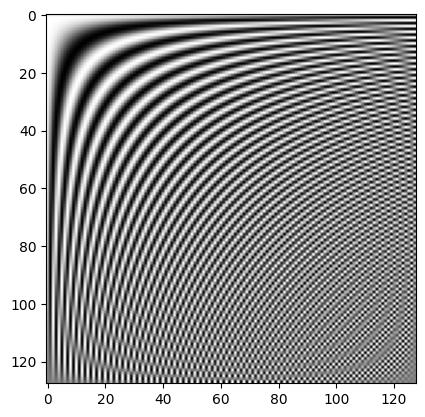

In [11]:
T = dct2d_matrix(M=128)
plt.figure()
plt.imshow(T, cmap='gray')
plt.show()

## Exercício 16
*Calcular a transformada DCT inversa*

O código abaixo calcula a DCT de uma imagem. Modifique o código abaixo para que a variável `C` receba o resultado de calcular a transformada DCT inversa de `B`, isto é, que `C` receba transformações realizadas em `B` que permitam recalcular `A`.  Para isso, leve em consideração que $T^T = T^{-1}$.

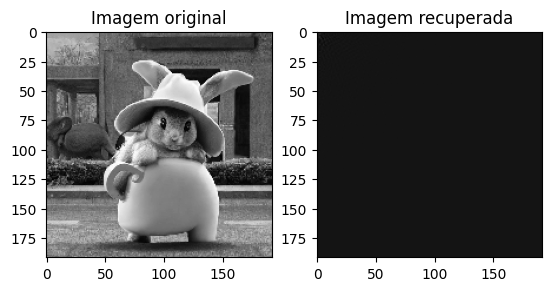

In [12]:
A = mpimg.imread("rabbit.jpeg").mean(axis=2)[::4,::4]
T = dct2d_matrix(M=A.shape[0])
B = T @ A @ T.T

C = B # Modifique isso - C deveria receber a transformada inversa de B

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagem recuperada')
plt.imshow(C, cmap='gray')
plt.show()

## Exercício 17
*Objetivo: entender a característica de concentração de informação da DCT*

O código abaixo mostra um histograma dos valores da DCT de uma imagem ao lado do histograma de valores de cinza da imagem original.

1. Qual é o valor mais comum encontrado numa DCT?
1. Se usarmos o código de Huffman, quantos bits precisamos para codificar um valor que é muito mais comum que os outros?

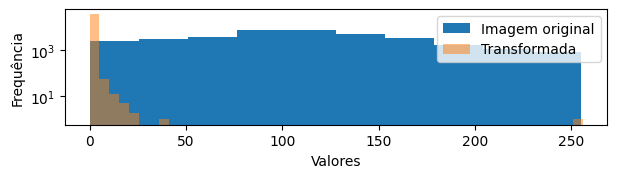

In [13]:
plt.figure(figsize=(7,1.5))
plt.hist(A.reshape( (-1,) ), bins=10, label='Imagem original')
plt.hist( 256*np.abs(B.reshape( (-1,) ))/np.max(np.abs(B)), bins=50, alpha=0.5, label='Transformada')
plt.semilogy()
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.legend()
plt.show()

## Exercício 18
*Objetivo: analisar o efeito de eliminar coeficientes da DCT*

O código abaixo elimina coeficientes da DCT que estão abaixo de um determinado valor.

1. Quantos coeficientes conseguimos eliminar da DCT sem que tenhamos distorções significativas na imagem?
1. Lembrando da distorção que tínhamos ao usar SVD para esse mesmo fim, qual das técnicas permite eliminar mais elementos ainda preservando, visualmente, a imagem?

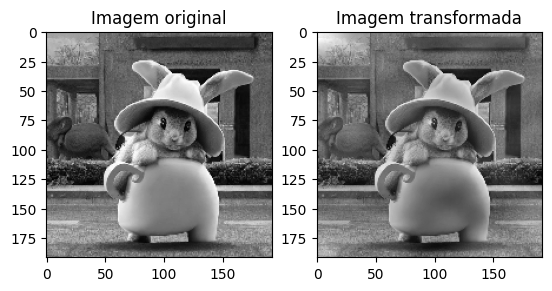

In [14]:
B = T @ A @ T.T
b = np.sort(B.reshape((-1,)))
B [ B<b[10] ] *= 0.0
A_ = T.T @ B @ T
plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagem transformada')
plt.imshow(A_, cmap='gray')
plt.show()

## Exercício 19
*Objetivo: realizar a filtragem da imagem em blocos*

Uma ideia para a aplicação da DCT para filtrar a imagem é aplicá-la em blocos de 8x8 pixels na imagem. Daí então, eliminamos coeficientes próximos da posição $(0,0)$ da matriz transformada aplicando uma máscara multiplicativa, e retornamos a imagem para o domínio original.

1. Quantos coeficientes conseguimos eliminar sem alterar significativamente o conteúdo da imagem?
1. Usando um código de Huffman, quanta compressão podemos conseguir para a DCT mascarada de nossa imagem?

[[1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
0.09375


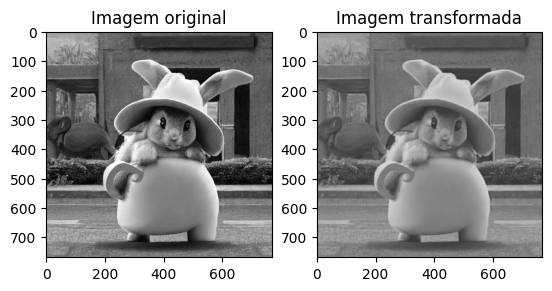

In [15]:
mascara = np.zeros( (8,8) )
for i in range(8):
    for j in range(8):
        if i+j<=2:
            mascara[i,j] = 1.0

print(mascara)

print(np.sum(mascara==1)/ (mascara.shape[0]*mascara.shape[1]))

A = mpimg.imread("rabbit.jpeg").mean(axis=2)

def compressao_bloco_8(imagem, mascara):
    T = dct2d_matrix(M=8)
    A_target = np.zeros(A.shape)
    for i in range(0, imagem.shape[0], 8):
        for j in range(0, imagem.shape[1], 8):
            B = T @ A[i:i+8, j:j+8] @ T.T
            B *= mascara
            A_target[i:i+8, j:j+8] = T.T @ B @ T
    return A_target

A_comprimido = compressao_bloco_8(A, mascara)

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagem transformada')
plt.imshow(A_comprimido, cmap='gray')
plt.show()

## Exercício 20
*Objetivo: explicar a compressão por DCT usando conceitos de álgebra linear*

Explique como cada um dos conceitos abaixo é usado no processo de compressão de imagens:

1. Multiplicação de matrizes
1. Matriz transposta
1. Mudança de base
1. Matriz inversa
1. Entropia



# Projeto

Neste projeto, vamos usar o conceito de entropia e tudo o que analisamos até o momento para fazer um jogador de forca.

1. Vamos instanciar uma classe JogodeForca, que defini logo abaixo. As regras estão no próprio código para não serem ambíguas.
1. O vocabulário permitido é o que está na URL `https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt`, e o jogador pode ter acesso a esse vocabulário.
1. O objetivo da atividade é fazer um jogador automático de forca que ganha o máximo de vezes possível com apenas 5 vidas.
1. Ao criar um novo jogo, o jogador recebe a informação de quantas letras a palavra tem.
1. Em uma jogada típica, o jogador escolhe uma letra. O "juiz" retorna ua lista com os índices em que essa letra aparece na palavra secreta. Se a letra não aparece, retorna uma lista vazia e o jogador perde uma vida.
1. A qualquer momento, o jogador pode consultar suas vidas (`jogo.vidas`), mas, obviamente, não pode consultar a palavra escolhida.
1. O jogador ganha quando, por saber qual palavra foi escolhida, usa o método `tentar_palavra` informando a palavra correta. Se usar o método mas não acertar, perde o jogo imediatamente.
1. Sempre que o jogador ganha o juiz retorna `True`. Quando ele perde, retorna `False`.


In [16]:
import random
class JogoDeForca:
    def __init__(self):
        import requests
        url = 'https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt'
        r = requests.get(url, allow_redirects=True)
        if r.status_code==200:
            self.content = str(r.content.decode()).split('\n')
        else:
            print("Erro: ", r.status_code)
    
    def novo_jogo(self, vidas=5):
        self.vidas = vidas
        self.palavra = random.choice(self.content)
        return len(self.palavra)

    def tentar_letra(self, letra):
        if self.vidas > 0:
            if letra in self.palavra:
                return [idx for idx in range(len(self.palavra)) if self.palavra[idx]==letra]
            else:
                self.vidas -= 1
                if self.vidas == 0:
                    print("Fim de jogo!")
                    return False
                else:
                    return []
        
    def tentar_palavra(self, palavra):
        if self.vidas > 0:
            if self.palavra == palavra:
                print ("Ganhou!")
                return True
            else:
                self.vidas = 0
                print("Fim de jogo!")
                return False

In [17]:
jogo = JogoDeForca()
print(jogo.novo_jogo())
print(jogo.palavra)
print(jogo.vidas)

ModuleNotFoundError: No module named 'requests'

In [ ]:
print(jogo.tentar_letra('b'))
print(jogo.tentar_letra('a'))
print(jogo.tentar_letra('w'))
print(jogo.vidas)

[]
[5, 7, 10]
[]
1


## Descrição do projeto

Neste projeto, o grupo deverá projetar e avaliar um jogador de forca. Em sua avaliação, deve executar um número grande de jogos diferentes (no mínimo 100) e então reportar a probabilidade de seu algoritmo vencer o jogo.

Anotações importantes:

1. O grupo deve enviar um link para o repositório GitHub onde está localizado o projeto.
2. No diretório principal do repositório, deve haver um *notebook* comentado `demo.ipynb`, que, quando executado, executa todos os testes que geram os resultados alcançados.
3. Embora haja muitas maneiras de realizar este algoritmo, é obrigatório que sua solução se baseie em conceitos que aprendemos sobre álgebra linear e teoria da informação, isto é, uma ideia que venha deste curso deve obrigatoriamente se o componente central de seu algoritmo.

**ENTREGAS**
* Link para o repositório onde está o projeto.
* No `README.md` do repositório, deve haver um resumo, com até 400 palavras, explicando qual foi a ideia implementada e como o conceito utilizado (que deve obrigatoriamente vir do nosso curso de álgebra linear e teoria da informação) foi usado para resolver o problema.
* O `demo.ipynb` deve estar comentado, célula a célula, em Markdown, explicando em linguagem natural a importância de cada passo e comentanto os resultados da execução de cada célula.
* O `demo.ipynb` deve ser colocado no repositório já executado, isto é, com todos os dados já gerados, de forma que seja possível visualizá-lo inteiramente sem executar as células.
* Importante: seu algoritmo não precisa ganhar sempre, e esta não é uma competição sobre "quem ganha mais". A avaliação está ligada a como você fez a conexão entre a ideia e a solução.

**RUBRICA**

O projeto será avaliado usando três rubricas. [Duas delas dizem respeito à redação e ao código apresentado](rubricas.md), e são compartilhados por todos os projetos. Em especial, a rubrica de *argumentação* será aplicada ao conjundo do `README.md` e das células em markdown do `demo.ipynb`. Este projeto tem ainda requisitos específicos que estão na rubrica abaixo. Os níveis são cumulativos, isto é, para passar de um nível, *todos* os requisitos dele devem ser cumpridos. A nota final é baseada na rubrica em que o trabalho obtiver o *menor* desempenho. As rubricas foram inspiradas nos níveis da [Taxonomia de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/).

| Nível | Descrição | [Tax. de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/) |
| --- | --- | --- |
| F | Não entregue, entregue sem completar o `README.md`, entregue sem o `demo.ipynb`, entregue sem resolver o problema que foi proposto, ou entregue sem usar claramente um conceito que venha do curso de álgebra linear/teoria da informação.  | Não fez |
| E | Entregue, com erros metodológicos graves, como usar um conceito que não tem nenhuma conexão com o problema ou implementá-lo de forma equivocada | Entender |
| D | O projeto tem erros na avaliação de desempenho ou deixa de conectar corretamente e sem equívocos o conceito utilizado à solução proposta. | Compreender |
| B | O projeto avalia corretamente jogador, mas não analisa os principais casos de erros. | Aplicar |
| A | O jogador foi avaliado corretamente, e os principais casos de erro foram explicitados, isto é, o grupo mostra como fazer seu jogador "falhar" e a justificativa dessas falhas. | Analisar |